# <center> Diabetes Disease Prediction

### <center> Libraries

In [1]:
pip install missingno

  Obtaining dependency information for missingno from https://files.pythonhosted.org/packages/87/22/cd5cf999af21c2f97486622c551ac3d07361ced8125121e907f588ff5f24/missingno-0.5.2-py3-none-any.whl.metadata
  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: '/opt/jupyterhub/pyvenv/lib/python3.10/site-packages/missingno'
Check the permissions.


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importing neccessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Data visualisation library
import sklearn as sk
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## <center> Diabetes

In [3]:
# The dataset is read
diabetes_dataframe=pd.read_csv('Dataset of Diabetes .csv')

In [4]:
#Check the type of the dataset
print('Type of dataset:', type(diabetes_dataframe))

Type of dataset: <class 'pandas.core.frame.DataFrame'>


In [5]:
diabetes_dataframe.head() # Top 5 rows of dataframe

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [6]:
# No_pation = Number of patients

In [7]:
diabetes_dataframe.tail()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y
999,248,24054,M,54,5.0,67,6.9,3.8,1.7,1.1,3.0,0.7,33.0,Y


### <center> Exploratory Data Analysis (EDA)

In [8]:
diabetes_dataframe.describe() # Gives us a mathematical notation for each column

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [9]:
#Attribute info
diabetes_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB


In [10]:
diabetes_dataframe.shape

(1000, 14)

In [11]:
import pandas as pd

# Read the dataset from the CSV file
diabetes_dataframe = pd.read_csv('Dataset of Diabetes .csv')

# Check the distribution of the target feature 'CLASS'
class_distribution = diabetes_dataframe['CLASS'].value_counts()

print('Class distribution:')
print(class_distribution)

Class distribution:
CLASS
Y    844
N    103
P     53
Name: count, dtype: int64


### Here we see the major class imbalance in favour of the positive diabetes class.

In [12]:
import pandas as pd

# Read the dataset from the CSV file
diabetes_dataframe = pd.read_csv('Dataset of Diabetes .csv')

# Clean the 'CLASS' column by stripping whitespace and converting to uppercase
diabetes_dataframe['CLASS'] = diabetes_dataframe['CLASS'].str.strip().str.upper()

# Check the distribution of the cleaned target feature 'CLASS'
class_distribution_cleaned = diabetes_dataframe['CLASS'].value_counts()

print('Cleaned class distribution:')
print(class_distribution_cleaned)
#Results for class type:
#Diabetic
#Non-Diabetic
#Predict-Diabetic

Cleaned class distribution:
CLASS
Y    844
N    103
P     53
Name: count, dtype: int64


In [13]:
print(diabetes_dataframe['CLASS'].unique())

['N' 'P' 'Y']


In [14]:
# Merge 'P' (Predict-Diabetic) with 'Y' (Diabetic)
diabetes_dataframe['CLASS'] = diabetes_dataframe['CLASS'].replace({'P': 'Y'})

In [15]:
print(diabetes_dataframe['CLASS'].unique())

['N' 'Y']


### <center> Data Filtering

In [16]:
diabetes_dataframe=diabetes_dataframe.drop(['ID','No_Pation'], axis=1)

In [17]:
diabetes_dataframe.shape # one less column since ID column has been dropped

(1000, 12)

In [18]:
label_encoder = LabelEncoder()
for column in diabetes_dataframe.columns:
    if diabetes_dataframe[column].dtype == object:
        diabetes_dataframe[column] = label_encoder.fit_transform(diabetes_dataframe[column])


In [19]:
diabetes_dataframe.isnull() # False indicates no missing values

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
diabetes_dataframe.isnull().sum()# number of missing values from each column

Gender    0
AGE       0
Urea      0
Cr        0
HbA1c     0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
CLASS     0
dtype: int64

In [21]:
# It appears that there are no missing values

In [22]:
# Create a copy of the dataframe and replace zero values with NaN for specified columns
diabetes_dataframe_copy = diabetes_dataframe.copy(deep=True)
columns_to_replace_zero = ['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS']
diabetes_dataframe_copy[columns_to_replace_zero] = diabetes_dataframe_copy[columns_to_replace_zero].replace(0, np.nan)

# Handle missing values: here we can choose to fill them with the mean of the column for simplicity
diabetes_dataframe_copy.fillna(diabetes_dataframe_copy.mean(), inplace=True)


print(diabetes_dataframe_copy.isnull().sum())

Gender    0
AGE       0
Urea      0
Cr        0
HbA1c     0
Chol      0
TG        0
HDL       0
LDL       0
VLDL      0
BMI       0
CLASS     0
dtype: int64


In [23]:
diabetes_dataframe.duplicated().sum() # checks for duplicated values

173

In [24]:
diabetes_dataframe['CLASS'].value_counts()

CLASS
1    897
0    103
Name: count, dtype: int64

In [25]:
diabetes_dataframe['CLASS'].unique

<bound method Series.unique of 0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    1
999    1
Name: CLASS, Length: 1000, dtype: int64>

In [26]:
#Prints the first 5 rows of the cleaned dataset# numbers exist in the gender and class columns
diabetes_dataframe.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


In [27]:
diabetes_dataframe['Gender'].unique()

array([0, 1, 2])

In [28]:
diabetes_dataframe['Gender']= diabetes_dataframe['Gender'].replace(['Male', 'Female'],[0,1])

In [29]:
diabetes_dataframe['Gender']

0      0
1      1
2      0
3      0
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Gender, Length: 1000, dtype: int64

### <center>  Data Visualisation

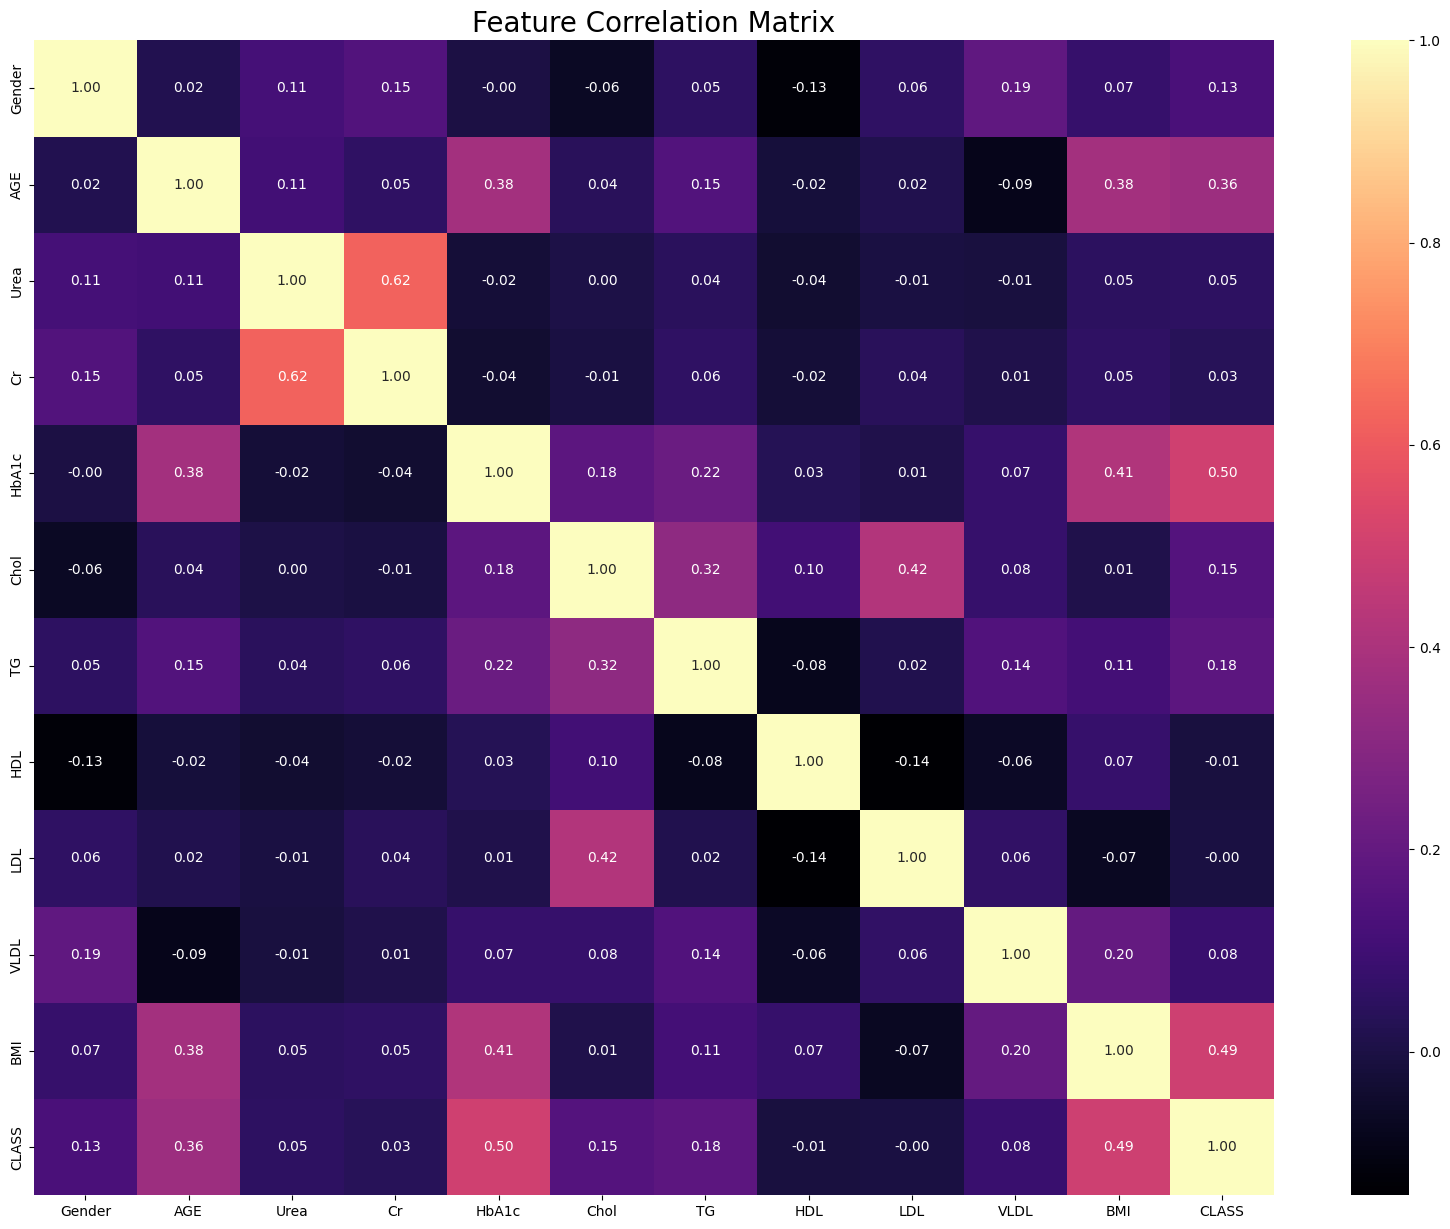

In [30]:
plt.figure(figsize=(20, 15))

# Create a heatmap with the correlation matrix of the Heart_dataframe
corr_matrix = diabetes_dataframe.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='magma')

# Title and font size
plt.title("Feature Correlation Matrix", fontsize=20)

# Display the plot
plt.show()

### HbA1c and BMI seem to have a high correlation with the Class

In [31]:
diabetes_dataframe['AGE'].unique()

array([50, 26, 33, 45, 48, 43, 32, 31, 30, 49, 42, 39, 41, 44, 47, 36, 38,
       46, 35, 40, 59, 51, 57, 63, 25, 60, 77, 54, 34, 55, 28, 56, 52, 69,
       73, 61, 58, 53, 66, 68, 62, 64, 67, 70, 79, 76, 65, 75, 20, 71])

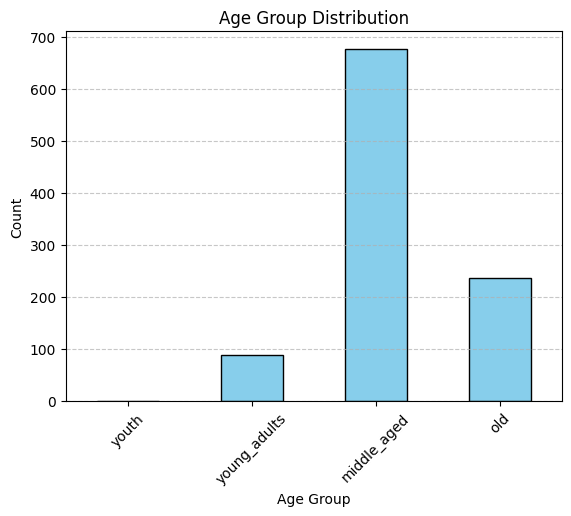

In [32]:
bins = [0, 20, 40, 60, 80]
labels = ['youth', 'young_adults', 'middle_aged', 'old']
diabetes_dataframe['Age_Group'] = pd.cut(diabetes_dataframe['AGE'], bins=bins, labels=labels, right=False)

# Plot the data
age_group_counts = diabetes_dataframe['Age_Group'].value_counts().sort_index()
age_group_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


In [33]:
diabetes_dataframe['BMI'].unique()

array([24.  , 23.  , 21.  , 22.  , 19.  , 20.  , 23.5 , 24.5 , 22.5 ,
       24.6 , 25.  , 30.  , 31.  , 32.  , 29.  , 28.  , 19.5 , 27.  ,
       37.2 , 27.4 , 34.3 , 29.5 , 34.6 , 27.3 , 31.2 , 40.5 , 47.  ,
       21.17, 40.  , 28.3 , 31.5 , 37.  , 35.  , 33.  , 39.  , 38.  ,
       26.  , 33.9 , 31.4 , 36.  , 34.  , 36.6 , 30.1 , 29.36, 32.9 ,
       43.25, 39.18, 34.5 , 33.6 , 34.05, 27.75, 35.2 , 36.11, 38.62,
       30.2 , 29.63, 28.36, 47.75, 37.62, 35.16, 27.33, 27.17, 32.65,
       25.6 ])

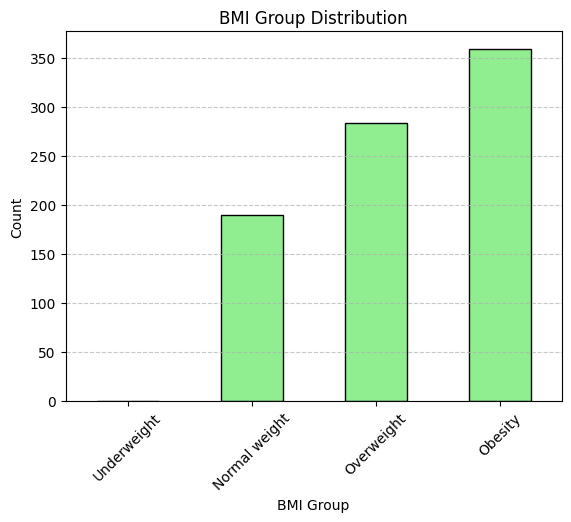

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
diabetes_dataframe = pd.read_csv('Dataset of Diabetes .csv')  

# Define BMI groups
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9]
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity']
diabetes_dataframe['BMI_Group'] = pd.cut(diabetes_dataframe['BMI'], bins=bmi_bins, labels=bmi_labels, right=False)

# Plot the data
bmi_group_counts = diabetes_dataframe['BMI_Group'].value_counts().sort_index()
bmi_group_counts.plot(kind='bar', color='lightgreen', edgecolor='black')

# Add title and labels
plt.title('BMI Group Distribution')
plt.xlabel('BMI Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

In [35]:
diabetes_dataframe ['Chol'].unique()

array([ 4.2 ,  3.7 ,  4.9 ,  2.9 ,  3.6 ,  3.8 ,  4.  ,  5.3 ,  5.  ,
        4.4 ,  0.5 ,  6.2 ,  4.8 ,  4.6 ,  5.5 ,  2.8 ,  5.6 ,  3.2 ,
        6.5 ,  3.  ,  9.5 ,  4.7 ,  5.2 ,  4.3 ,  4.1 ,  3.9 ,  3.1 ,
        3.4 ,  7.6 ,  6.3 ,  4.5 ,  2.  ,  0.  ,  5.9 ,  5.4 ,  2.1 ,
        6.1 ,  5.7 ,  5.1 ,  6.  ,  6.7 ,  6.8 ,  2.5 ,  2.4 ,  5.8 ,
        7.  ,  7.1 ,  6.6 ,  7.2 ,  3.5 ,  2.7 ,  2.6 ,  0.6 ,  8.5 ,
        2.3 ,  3.3 ,  8.8 ,  7.3 ,  6.4 ,  6.9 ,  9.9 ,  9.8 ,  9.3 ,
        7.9 , 10.3 ,  9.7 ,  9.1 ,  1.2 ,  6.12,  8.4 ,  7.7 ,  9.2 ,
        8.1 ,  8.  ,  7.4 ,  8.6 ,  7.5 ])

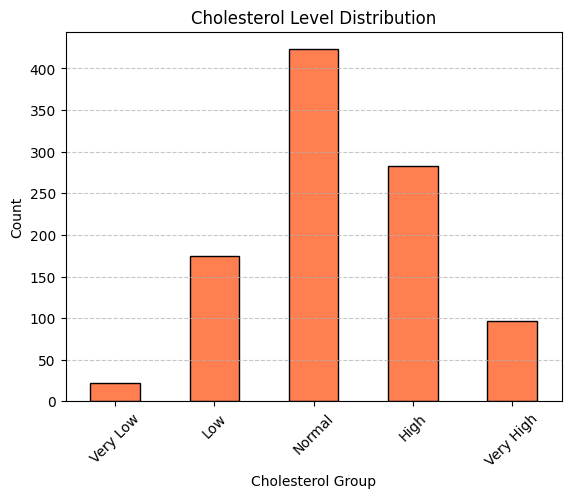

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Dataset of Diabetes .csv'
diabetes_dataframe = pd.read_csv(file_path)

# Define cholesterol groups based on common classifications
cholesterol_bins = [0, 2.5, 3.9, 5.2, 6.5, 10.0]  # Adjusted for your data
cholesterol_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
diabetes_dataframe['Cholesterol_Group'] = pd.cut(diabetes_dataframe['Chol'], bins=cholesterol_bins, labels=cholesterol_labels, right=False)

# Plot the data
cholesterol_group_counts = diabetes_dataframe['Cholesterol_Group'].value_counts().sort_index()
cholesterol_group_counts.plot(kind='bar', color='coral', edgecolor='black')

# Add title and labels
plt.title('Cholesterol Level Distribution')
plt.xlabel('Cholesterol Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

In [37]:
diabetes_dataframe ['HbA1c'].unique()

array([ 4.9 ,  4.  ,  4.2 ,  4.1 ,  5.1 ,  5.  ,  5.4 ,  4.5 ,  5.3 ,
        5.5 ,  4.3 ,  4.8 ,  4.7 ,  3.7 ,  5.6 ,  0.9 ,  6.  ,  5.7 ,
        5.8 ,  6.2 ,  6.1 ,  6.4 ,  5.9 ,  6.3 , 12.3 ,  6.7 , 10.2 ,
       11.2 ,  6.5 ,  6.9 ,  7.7 ,  7.2 , 13.7 ,  5.2 ,  4.6 ,  9.7 ,
        7.  ,  7.5 ,  8.9 ,  7.4 ,  6.8 , 10.4 ,  7.8 ,  9.9 ,  7.3 ,
        8.1 ,  8.  ,  9.  , 11.8 ,  9.1 , 10.7 ,  7.6 , 10.3 ,  7.9 ,
        8.5 , 12.1 ,  9.8 ,  9.2 , 10.1 ,  8.7 ,  9.3 ,  8.8 , 11.  ,
       10.5 ,  9.6 , 10.6 , 11.5 ,  7.1 ,  9.5 , 10.9 ,  8.2 , 11.4 ,
       11.7 , 12.  ,  9.4 ,  8.3 ,  8.6 , 11.3 , 10.  , 13.1 , 10.8 ,
        6.6 , 12.8 ,  2.  , 14.7 , 11.9 , 12.4 , 12.2 , 12.9 , 12.6 ,
       11.6 ,  8.4 , 13.  , 12.5 , 12.7 , 11.1 , 13.6 , 13.8 , 14.6 ,
        3.  , 14.5 , 13.9 , 13.2 , 15.9 , 14.8 , 14.4 , 15.  , 14.1 ,
       16.  , 13.3 ,  9.96])

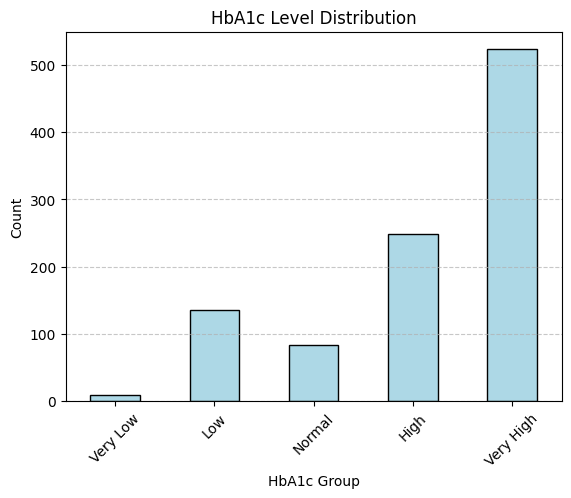

In [38]:
hba1c_bins = [0, 4.0, 5.6, 6.4, 8.0, 17.0]  # Adjust the upper limit as per the maximum value in the provided data
hba1c_labels = ['Very Low', 'Low', 'Normal', 'High', 'Very High']
diabetes_dataframe_copy['HbA1c_Group'] = pd.cut(diabetes_dataframe_copy['HbA1c'], bins=hba1c_bins, labels=hba1c_labels, right=False)


# Plot the HbA1c group distribution
hba1c_group_counts = diabetes_dataframe_copy['HbA1c_Group'].value_counts().sort_index()
hba1c_group_counts.plot(kind='bar', color='lightblue', edgecolor='black')

# Add title and labels
plt.title('HbA1c Level Distribution')
plt.xlabel('HbA1c Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()



In [39]:
diabetes_dataframe=diabetes_dataframe.drop(['ID','No_Pation'], axis=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


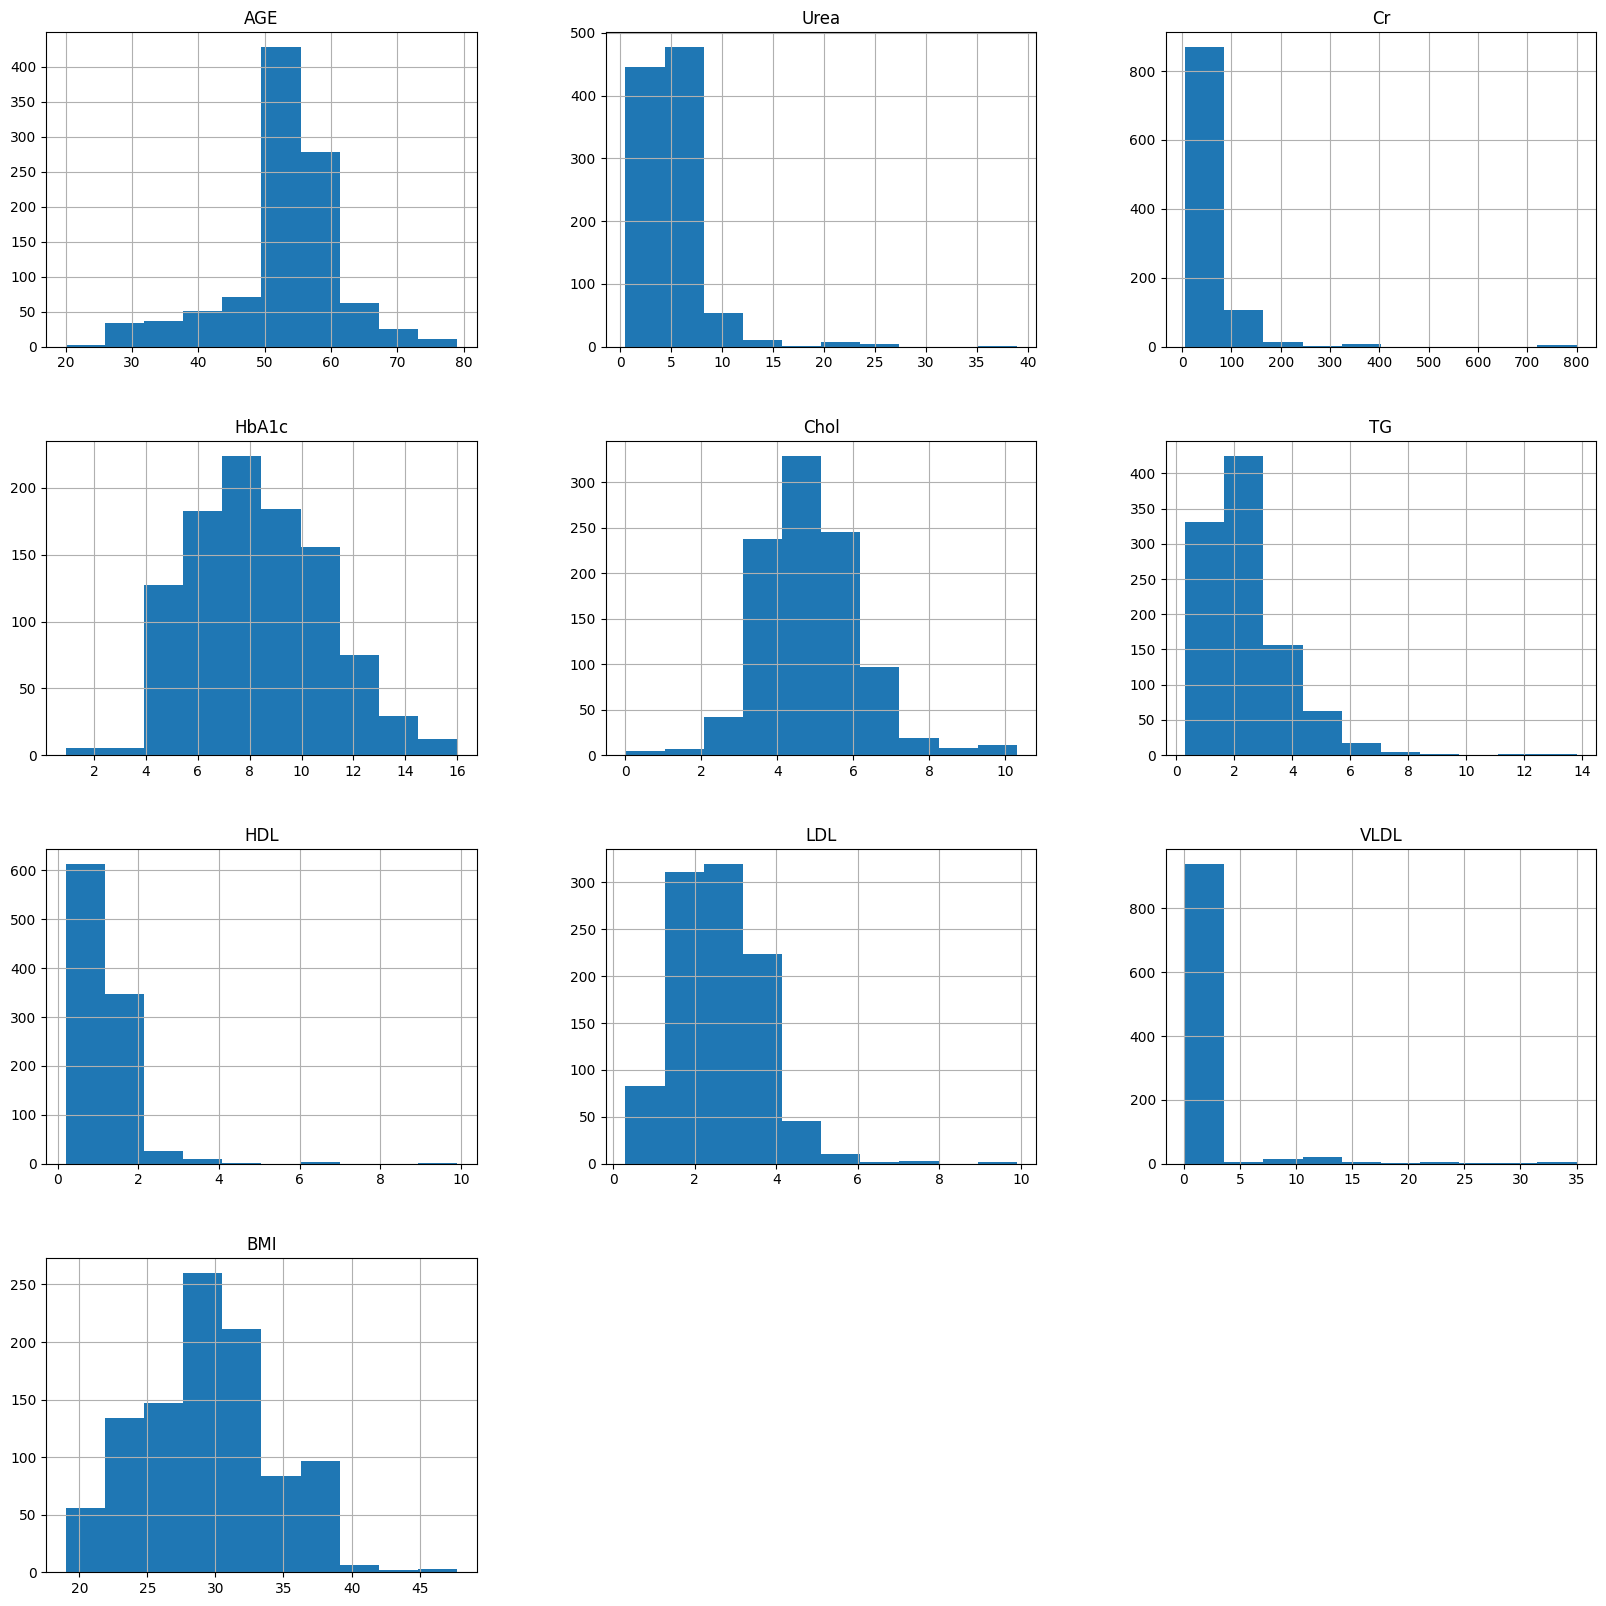

In [40]:
Distribution_attributes = diabetes_dataframe.hist(figsize= (20,20)) # Visualises the distribution of data for each plot

plt.xlabel('Values')
plt.ylabel('No.of People')
plt.legend()
plt.show()

## How many people have Diabetes and don't have diabetes within this dataset

In [41]:
diabetes_dataframe.columns

Index(['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL',
       'VLDL', 'BMI', 'CLASS', 'Cholesterol_Group'],
      dtype='object')

In [42]:
diabetes_dataframe['CLASS'] = diabetes_dataframe['CLASS'].replace({'P': 'Y'})

In [43]:
print(diabetes_dataframe['CLASS'].unique())

['N' 'Y']


In [44]:
diabetes_dataframe['CLASS'].value_counts()

CLASS
Y    897
N    103
Name: count, dtype: int64

### <center> Data Preparation

In [45]:
# The data gets split into an independent x dataset for the features and y dataset for the target
x = diabetes_dataframe.drop(['CLASS'], axis=1)
y = diabetes_dataframe ['CLASS']

In [46]:
 #x = np.array(diabetes_dataframe[['ID','No_Pation','Gender','AGE','Urea','Cr','HbA1c','Chol','TG','HDL','LDL','VLDL']])
 #y = np.array(diabetes_dataframe[['CLASS']])

In [47]:
print(x)

    Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL   BMI  \
0        F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0   
1        M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6  23.0   
2        F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0   
3        F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5  24.0   
4        M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4  21.0   
..     ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   ...   
995      M   71  11.0  97    7.0   7.5  1.7  1.2  1.8   0.6  30.0   
996      M   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4  37.2   
997      M   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1  27.4   
998      M   38   5.8  59    6.7   5.3  2.0  1.6  2.9  14.0  40.5   
999      M   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7  33.0   

    Cholesterol_Group  
0              Normal  
1                 Low  
2              Normal  
3              Normal  
4              Normal  
..                ...  
995

In [48]:
print (y)

0      N
1      N
2      N
3      N
4      N
      ..
995    Y
996    Y
997    Y
998    Y
999    Y
Name: CLASS, Length: 1000, dtype: object


In [49]:
x = pd.get_dummies(x, columns=['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG','HDL','LDL', 'VLDL', 'BMI', 'Cholesterol_Group'])

In [50]:
label_encoder = LabelEncoder()
for column in diabetes_dataframe.columns:
    if diabetes_dataframe[column].dtype == object:
        diabetes_dataframe[column] = label_encoder.fit_transform(diabetes_dataframe[column])

In [51]:
#Split the data into train and test sets- not it is 80% train and 20% test
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

  
print(f"Train: {x_train.shape}, {y_train.shape}") 
print(f"Test: {x_test.shape}, {y_test.shape}")

Train: (800, 775), (800,)
Test: (200, 775), (200,)


In [52]:
from sklearn.naive_bayes import BernoulliNB

# The data gets split into an independent x dataset for the features and y dataset for the target
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
scaler = StandardScaler() # Transforms data so that distribution will have a mean value of 0 and a standard deviation of 1~ stack overflow- standardisation recommended when feature distrubution is Gaussian
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model = BernoulliNB() 
model.fit(x_train,y_train)

BernoulliNB()

### <center>  Training the model

In [53]:
#Building the model
from sklearn import tree  #import scikit package
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report

In [54]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, weights=[0.6, 0.4])

In [55]:
class_priors = [0.6, 0.4] 

In [56]:
#used in classification.assumes the features follow a normal distribution ~ Gaussian distribution
#Bernoulli is deemed useful if your feature vectors are boolean(i.e. zeros and ones)
model = BernoulliNB() 

In [57]:
model.fit(x_train, y_train)

BernoulliNB()

In [58]:
model.predict(x_train)

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y

In [59]:
y_pred=model.predict(x_test)

In [60]:
from sklearn import metrics

In [61]:
print("accuracy score = " , metrics.accuracy_score(y_test, y_pred)*100)

accuracy score =  97.5


In [62]:
# Predict the labels for training and test sets
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test =accuracy_score(y_test, y_test_pred)

In [63]:
#Print the accuracy on training and test sets
print('Accuracy on training data:', accuracy_train)
print('Accuracy on test data:', accuracy_test)

Accuracy on training data: 0.99
Accuracy on test data: 0.975


In [64]:
# Classification report
test_pred= model.predict(x_test)

print(metrics.classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           N       0.94      0.81      0.87        21
           Y       0.98      0.99      0.99       179

    accuracy                           0.97       200
   macro avg       0.96      0.90      0.93       200
weighted avg       0.97      0.97      0.97       200



In [65]:
probabilities = model.predict_proba(x_test)

# Optionally, display the probabilities for the first few instances
print(probabilities[:200])

# First row is the Non diabetic class, the second row is the Positive Diabetic class 

[[4.92494767e-04 9.99507505e-01]
 [5.30067081e-06 9.99994699e-01]
 [5.36177230e-06 9.99994638e-01]
 [3.56492040e-05 9.99964351e-01]
 [2.45805315e-04 9.99754195e-01]
 [1.91436266e-07 9.99999809e-01]
 [3.42075735e-08 9.99999966e-01]
 [8.60522723e-07 9.99999139e-01]
 [6.39076267e-04 9.99360924e-01]
 [6.06389438e-05 9.99939361e-01]
 [9.33192053e-05 9.99906681e-01]
 [8.64592386e-01 1.35407614e-01]
 [1.06937356e-04 9.99893063e-01]
 [7.17361525e-04 9.99282638e-01]
 [1.00221480e-04 9.99899779e-01]
 [1.49567075e-06 9.99998504e-01]
 [1.83225890e-05 9.99981677e-01]
 [3.94637938e-05 9.99960536e-01]
 [1.59531106e-07 9.99999840e-01]
 [5.58631006e-06 9.99994414e-01]
 [8.42205329e-09 9.99999992e-01]
 [7.33646767e-03 9.92663532e-01]
 [7.87676082e-06 9.99992123e-01]
 [3.62724411e-08 9.99999964e-01]
 [1.80829627e-04 9.99819170e-01]
 [1.91510619e-04 9.99808489e-01]
 [9.90323871e-01 9.67612857e-03]
 [1.43174212e-05 9.99985683e-01]
 [1.86916118e-06 9.99998131e-01]
 [9.45339461e-06 9.99990547e-01]
 [1.330661

In [68]:
import joblib

# Assuming `model` is your trained Naive Bayes (Bernoulli) model
joblib.dump(model, 'Disease prediction data.pkl')

['Disease prediction data.pkl']

In [69]:
import sys
sys.executable

'/opt/jupyterhub/pyvenv/bin/python3.10'

In [70]:
model = joblib.load("Disease prediction data.pkl")

joblib.dump(model,"Disease prediction data.pkl")

['Disease prediction data.pkl']

In [71]:
import pickle
from sklearn.naive_bayes import BernoulliNB

# Assume `model` is your trained model
model = BernoulliNB()

model.fit(x_train, y_train)

# Save the model
with open('Disease prediction data.pkl', 'wb') as f:
    pickle.dump(model, f)

In [72]:
import pickle

try:
    with open('Disease prediction data.pkl', 'rb') as f:
        model = pickle.load(f)
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")

Model loaded successfully.


In [73]:
import pickle
from sklearn.naive_bayes import BernoulliNB

# Example: Create and save a dummy model
model = BernoulliNB()

# Save the model to a file using pickle
with open('Disease prediction data.pkl', 'wb') as f:
    pickle.dump(model, f)



    

In [74]:
model_path = r'Disease prediction data.pkl'
with open(model_path, 'rb') as f:
    model = pickle.load(f)


In [75]:
import os
os.getcwd()

'/home/bwc/sb2389/Dissertation'

In [76]:
pickle.dump(model,open('Disease prediction data.pkl','wb'))

In [77]:
import pickle

# Load the model to verify
with open('Disease prediction data.pkl', 'rb') as f:
    model = pickle.load(f)

print(type(model))
print(dir(model))

<class 'sklearn.naive_bayes.BernoulliNB'>
['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_build_request_for_signature', '_check_X', '_check_X_y', '_check_alpha', '_check_feature_names', '_check_n_features', '_count', '_estimator_type', '_get_default_requests', '_get_metadata_request', '_get_param_names', '_get_tags', '_init_counters', '_joint_log_likelihood', '_more_tags', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_update_class_log_prior', '_update_feature_log_prob', '_validate_data', '_validate_params', 'alpha', 'binarize', 'class_prior', 'fit',

In [78]:
import pickle
from sklearn.naive_bayes import BernoulliNB

# Example: Create and save a dummy model
model = BernoulliNB()

# Save the model to a file using pickle

with open('Disease prediction data.pkl', 'wb') as file:
    pickle.dump(model, file)